In [1]:
pip install backtrader

Note: you may need to restart the kernel to use updated packages.


In [22]:
# 导入基础库
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib.font_manager as fm 
import seaborn as sns 
import ccxt 
import backtrader as bt
from datetime import datetime, timedelta 


# 设置绘图样式
plt.style.use('seaborn-v0_8') 
plt.rcParams['figure.figsize'] = (14, 7) 
plt.rcParams['font.size'] = 12  

# 显示所有列、行
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 1000)
pd.set_option('display.unicode.ambiguous_as_wide' , True)
pd.set_option('display.unicode.east_asian_width', True)

In [ ]:
准备回测数据

In [24]:
# 辅助函数：创建Backtrader数据源
def create_bt_data_feed(csv_file):
    return bt.feeds.GenericCSVData(
        dataname=csv_file,  # CSV文件路径
        fromdate=datetime.strptime(start_date, '%Y-%m-%d'),  # 回测开始日期
        todate=datetime.strptime(end_date, '%Y-%m-%d'),  # 回测结束日期
        dtformat='%Y/%m/%d %H:%M',  # 日期时间格式
        timeframe=bt.TimeFrame.Days,  # 时间周期为日线
        compression=1,  # 数据压缩比例
        openinterest=-1,  # 无未平仓量字段
        reverse=False,  # 是否反转数据
        header=0,  # CSV文件有表头
        open=1,  # 开盘价列索引
        high=2,  # 最高价列索引
        low=3,  # 最低价列索引
        close=4,  # 收盘价列索引
        volume=5,  # 成交量列索引
    )

# 辅助函数：运行回测
def run_backtest(strategy_class, data_feed, cash=10000.0, commission=0.00095, **strategy_params):
    # 创建Cerebro引擎
    cerebro = bt.Cerebro()
    
    # 添加数据
    cerebro.adddata(data_feed)
    
    # 添加策略
    cerebro.addstrategy(strategy_class, **strategy_params)
    
    # 设置初始资金和佣金
    cerebro.broker.setcash(cash)
    cerebro.broker.setcommission(commission=commission)
    
    # 添加分析器
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe', riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    
    # 运行策略
    initial_value = cerebro.broker.getvalue()
    print(f'初始资金: ${initial_value:.2f}')
    
    results = cerebro.run()
    strategy = results[0]
    
    # 获取最终资金
    final_value = cerebro.broker.getvalue()
    print(f'最终资金: ${final_value:.2f}')
    print(f'盈亏: ${final_value - initial_value:.2f} ({(final_value / initial_value - 1) * 100:.2f}%)')
    
    # 分析结果
    print('\n--- 性能指标 ---')
    print(f'夏普比率: {strategy.analyzers.sharpe.get_analysis()["sharperatio"]:.4f}')
    print(f'最大回撤: {strategy.analyzers.drawdown.get_analysis()["max"]["drawdown"]:.2f}%')
    print(f'年化收益率: {strategy.analyzers.returns.get_analysis()["rnorm100"]:.2f}%')
    
    return cerebro, strategy, results

初始资金: 100.00
2022-07-28, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.004195 BTC
2022-07-29, 买单执行, 价格: 23836.20, 数量: 0.004195 BTC
2022-08-29, 卖出信号 (fast_ma<slow_ma), 卖出全部: 0.004195 BTC
2022-08-30, 卖单执行, 价格: 20275.50, 数量: -0.004195 BTC
2022-10-31, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.004153 BTC
2022-11-01, 订单取消/拒绝
2022-12-25, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.005056 BTC
2022-12-26, 订单取消/拒绝
2023-01-12, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.004515 BTC
2023-01-13, 订单取消/拒绝
2023-03-19, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.003043 BTC
2023-03-20, 订单取消/拒绝
2023-06-25, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.002793 BTC
2023-06-26, 买单执行, 价格: 30458.00, 数量: 0.002793 BTC
2023-08-03, 卖出信号 (fast_ma<slow_ma), 卖出全部: 0.002793 BTC
2023-08-04, 卖单执行, 价格: 29180.10, 数量: -0.002793 BTC
2023-10-01, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.002912 BTC
2023-10-02, 买单执行, 价格: 27981.40, 数量: 0.002912 BTC
2024-01-24, 卖出信号 (fast_ma<slow_ma), 卖出全部: 0.002912 BTC
2024-01-25, 卖单执行, 价格: 40078.80, 数量: -0.002912 BTC
2024-02-12, 买入信号 (fast_ma>slow_ma), 全仓买入: 0.002337 BTC
2024-

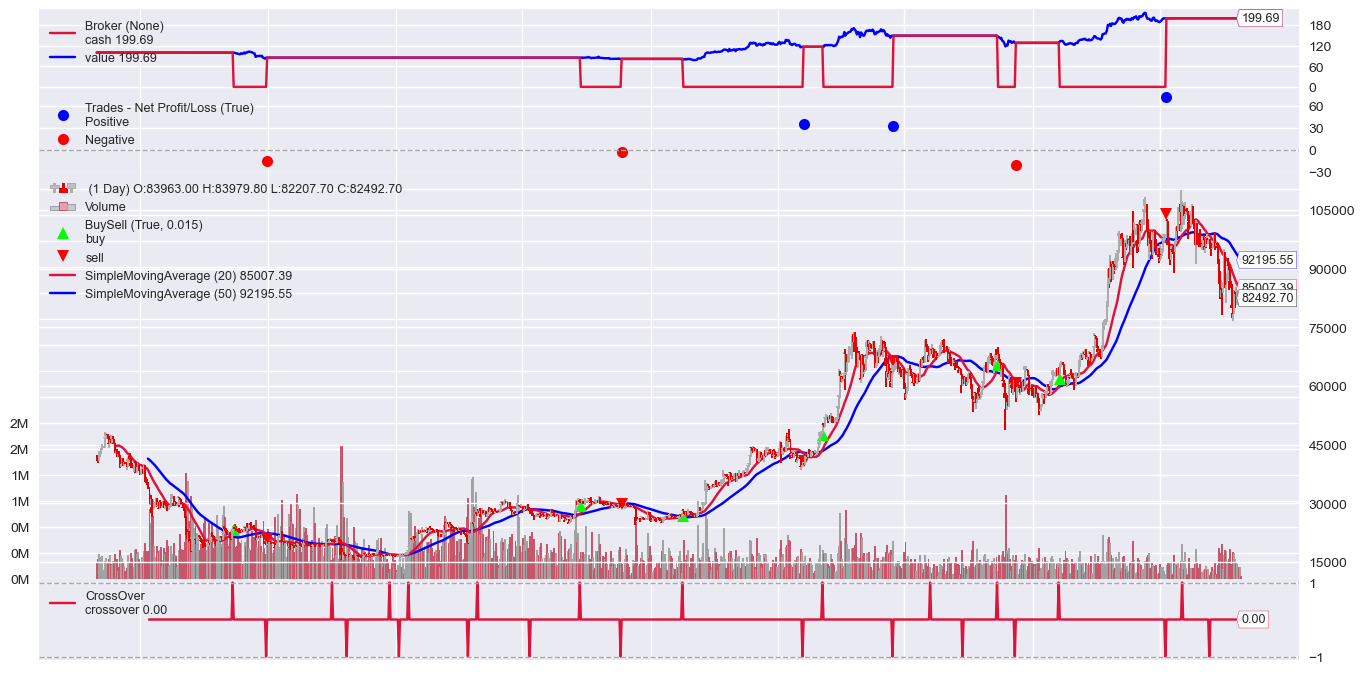

[[<Figure size 1400x700 with 5 Axes>]]

初始资金: 100000.00
2022-07-28, 买入信号 (fast_ma>slow_ma), 买入: 4.195 BTC, 花费: 99992.86 元
2022-07-29, 买单执行, 价格: 23836.20, 数量: 4.195 BTC
2022-08-29, 卖出信号 (fast_ma<slow_ma), 卖出全部: 4.195 BTC
2022-08-30, 卖单执行, 价格: 20275.50, 数量: -4.195 BTC
2022-10-31, 买入信号 (fast_ma>slow_ma), 买入: 4.153 BTC, 花费: 85061.75 元
2022-11-01, 买单执行, 价格: 20482.10, 数量: 4.153 BTC
2022-11-14, 卖出信号 (fast_ma<slow_ma), 卖出全部: 4.153 BTC
2022-11-15, 卖单执行, 价格: 16605.30, 数量: -4.153 BTC
2022-12-25, 买入信号 (fast_ma>slow_ma), 买入: 4.098 BTC, 花费: 68946.39 元
2022-12-26, 买单执行, 价格: 16824.50, 数量: 4.098 BTC
2023-01-03, 卖出信号 (fast_ma<slow_ma), 卖出全部: 4.098 BTC
2023-01-04, 卖单执行, 价格: 16667.30, 数量: -4.098 BTC
2023-01-12, 买入信号 (fast_ma>slow_ma), 买入: 3.626 BTC, 花费: 68306.59 元
2023-01-13, 买单执行, 价格: 18838.10, 数量: 3.626 BTC
2023-03-10, 卖出信号 (fast_ma<slow_ma), 卖出全部: 3.626 BTC
2023-03-11, 卖单执行, 价格: 20140.30, 数量: -3.626 BTC
2023-03-19, 买入信号 (fast_ma>slow_ma), 买入: 2.612 BTC, 花费: 73020.29 元
2023-03-20, 买单执行, 价格: 27955.80, 数量: 2.612 BTC
2023-05-08, 卖出信号 (fast_ma<sl

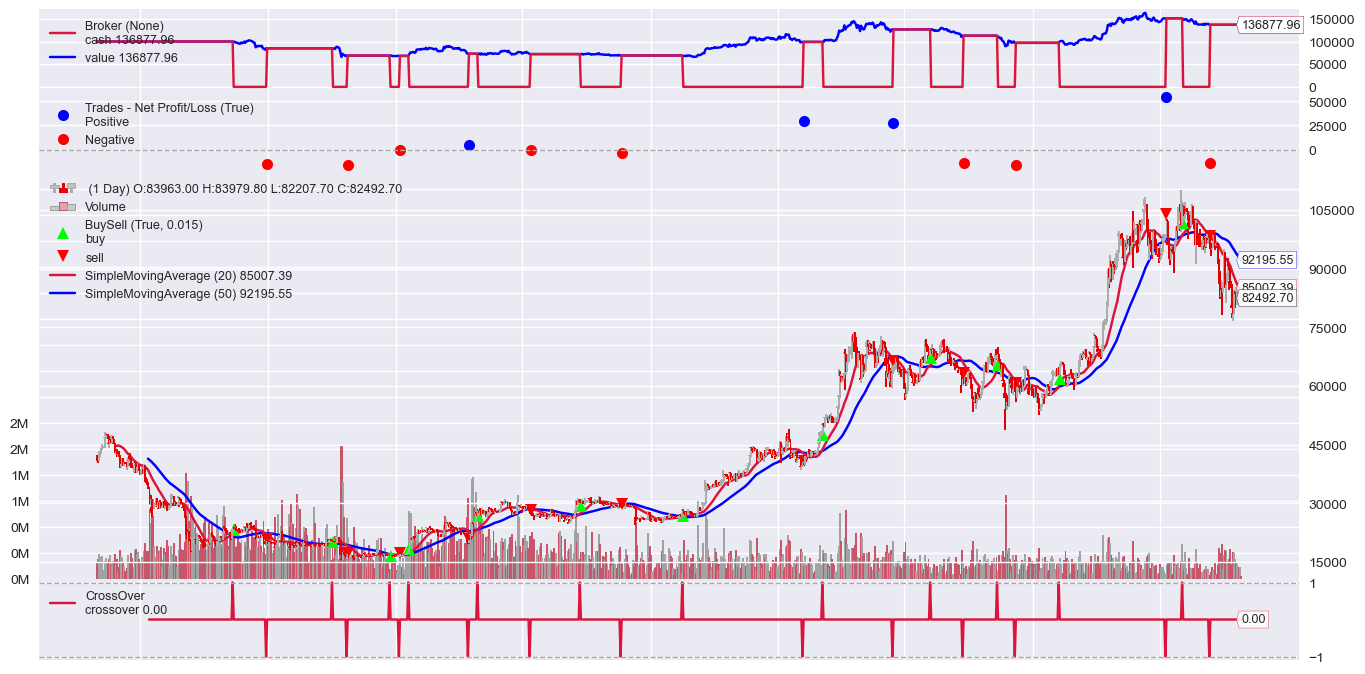

[[<Figure size 1400x700 with 5 Axes>]]

In [25]:
import backtrader as bt
import pandas as pd
import math

# 策略类：均线交叉策略
class MovingAverageCrossStrategy(bt.Strategy):
    """
    短期均线(SMA_Fast)上穿长期均线(SMA_Slow) => 全仓买入
    下穿 => 卖出全部
    """
    params = (
        ('fast_period', 20),  # 短期均线周期
        ('slow_period', 50),  # 长期均线周期
        ('printlog', True),   # 是否打印日志
        ('min_trade_size', 0.001),  # 最小交易单位（0.001 BTC）
    )

    def log(self, txt, dt=None):
        if self.params.printlog:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')

    def __init__(self):
        self.order = None  # 当前订单

        # 计算短期和长期均线
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.datas[0].close, period=self.params.fast_period
        )
        self.slow_ma = bt.indicators.SimpleMovingAverage(
            self.datas[0].close, period=self.params.slow_period
        )

        # 交叉信号
        self.crossover = bt.indicators.CrossOver(self.fast_ma, self.slow_ma)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'买单执行, 价格: {order.executed.price:.2f}, 数量: {order.executed.size:.3f} BTC')
            else:
                self.log(f'卖单执行, 价格: {order.executed.price:.2f}, 数量: {order.executed.size:.3f} BTC')

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('订单取消/拒绝')

        self.order = None

    def next(self):
        if self.order:
            return

        # 若无持仓，且短期MA上穿长期MA => 全仓买入
        if not self.position:
            if self.crossover > 0:
                cash = self.broker.getcash()  # 获取可用资金
                price = self.datas[0].close[0]  # 获取当前价格
                min_trade_cost = self.params.min_trade_size * price  # 计算最小交易单位所需金额

                # 计算可以购买的最大整数倍的最小交易单位
                max_affordable_units = math.floor(cash / min_trade_cost)
                size = max_affordable_units * self.params.min_trade_size  # 计算实际购买数量
                size = round(size, 3)  # 四舍五入到小数点后三位

                if size >= self.params.min_trade_size:
                    # 计算实际花费的金额
                    cost = size * price
                    # 确保花费的金额不超过可用资金
                    if cost <= cash:
                        self.log(f'买入信号 (fast_ma>slow_ma), 买入: {size:.3f} BTC, 花费: {cost:.2f} 元')
                        self.order = self.buy(size=size)
                    else:
                        self.log(f'资金不足，无法购买 {size:.3f} BTC (需要 {cost:.2f} 元，但只有 {cash:.2f} 元)')
                else:
                    self.log(f'资金不足，无法购买最小交易单位 (需要至少 {self.params.min_trade_size:.3f} BTC)')
        else:
            # 若已持仓，且短期MA下穿长期MA => 卖出全部
            if self.crossover < 0:
                size = self.position.size
                size = round(size, 3)  # 四舍五入到小数点后三位
                self.log(f'卖出信号 (fast_ma<slow_ma), 卖出全部: {size:.3f} BTC')
                self.order = self.sell(size=size)

    def stop(self):
        self.log(f'策略结束，期末资金: {self.broker.getvalue():.2f}')


# ---------------------------
# 回测配置
# ---------------------------

# 创建 Cerebro 回测引擎
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)  # 设置初始资金（可以根据需要调整）

# 将策略加入引擎，同时打开日志便于调试（printlog=True）
cerebro.addstrategy(MovingAverageCrossStrategy, fast_period=20, slow_period=50, printlog=True)

# 加载数据
csv_file = "/Users/zhangyikun/Desktop/BTCUSDT_past_year_stock_data.csv"  # 替换为你的文件路径
data = pd.read_csv(csv_file, parse_dates=['candle_begin_time_GMT8'], index_col='candle_begin_time_GMT8')
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# 输出初始资金
print('初始资金: %.2f' % cerebro.broker.getvalue())

# 运行回测
cerebro.run()

# 输出最终资金
print('期末资金: %.2f' % cerebro.broker.getvalue())

# ---------------------------
# 绘制回测结果图
# ---------------------------
%matplotlib inline
cerebro.plot(style='candlestick', iplot=False)

In [26]:
import backtrader as bt
import pandas as pd
import math

# ---------------------------
# 1. 定义布林带策略（全仓进出）
# ---------------------------
class BollingerBandsStrategy(bt.Strategy):
    """
    简单布林带均值回归:
    - 收盘价 < 下轨 => 全仓买入
    - 收盘价 > 上轨 => 全部卖出
    """
    params = (
        ('period', 20),  # 布林带周期
        ('devfactor', 2.0),  # 标准差倍数
        ('printlog', True),  # 是否打印日志
        ('min_trade_size', 0.001),  # 最小交易单位（0.001 BTC）
    )

    def log(self, txt, dt=None):
        if self.params.printlog:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')

    def __init__(self):
        self.order = None  # 当前订单
        self.boll = bt.indicators.BollingerBands(
            self.datas[0],
            period=self.params.period,
            devfactor=self.params.devfactor
        )

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'买单执行, 价格: {order.executed.price:.2f}, 数量: {order.executed.size:.3f} BTC')
            else:
                self.log(f'卖单执行, 价格: {order.executed.price:.2f}, 数量: {order.executed.size:.3f} BTC')

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('订单取消/拒绝')

        self.order = None

    def next(self):
        close_price = self.datas[0].close[0]  # 当前收盘价
        top = self.boll.top[0]  # 布林带上轨
        bot = self.boll.bot[0]  # 布林带下轨

        self.log(f'收盘价: {close_price:.2f}, 上轨: {top:.2f}, 下轨: {bot:.2f}')

        if self.order:
            return

        if not self.position:
            # 跌破下轨 => 全仓买入
            if close_price < bot:
                cash = self.broker.getcash()  # 可用资金
                price = close_price
                min_trade_cost = self.params.min_trade_size * price  # 最小交易单位所需金额

                # 计算可以购买的最大整数倍的最小交易单位
                max_affordable_units = math.floor(cash / min_trade_cost)
                size = max_affordable_units * self.params.min_trade_size  # 实际购买数量
                size = round(size, 3)  # 四舍五入到小数点后三位

                if size >= self.params.min_trade_size:
                    cost = size * price  # 实际花费
                    if cost <= cash:
                        self.log(f'买入信号 (收盘价<下轨), 买入: {size:.3f} BTC, 花费: {cost:.2f} 元')
                        self.order = self.buy(size=size)
                    else:
                        self.log(f'资金不足，无法购买 {size:.3f} BTC (需要 {cost:.2f} 元，但只有 {cash:.2f} 元)')
                else:
                    self.log(f'资金不足，无法购买最小交易单位 (需要至少 {self.params.min_trade_size:.3f} BTC)')
        else:
            # 突破上轨 => 全部卖出
            if close_price > top:
                size = self.position.size
                size = round(size, 3)  # 四舍五入到小数点后三位
                self.log(f'卖出信号 (收盘价>上轨), 卖出全部: {size:.3f} BTC')
                self.order = self.sell(size=size)

    def stop(self):
        self.log(f'策略结束，期末资金: {self.broker.getvalue():.2f}')


# ---------------------------
# 2. 定义自定义 Analyzer 用于记录资金曲线
# ---------------------------
class EquityCurveAnalyzer(bt.Analyzer):
    def start(self):
        self.equity = []  # 资金曲线
        self.dates = []  # 日期

    def next(self):
        # 每个 bar 记录一次资金量
        self.equity.append(self.strategy.broker.getvalue())
        # 将 datetime 转换为日期对象
        dt = self.strategy.datas[0].datetime.date(0)
        self.dates.append(dt)

    def get_analysis(self):
        return {'dates': self.dates, 'equity': self.equity}


# ---------------------------
# 3. 创建并运行回测引擎
# ---------------------------
cerebro = bt.Cerebro()

# 设置初始资金
cerebro.broker.setcash(100000.0)

# 添加数据源
csv_file = "/Users/zhangyikun/Desktop/BTCUSDT_past_year_stock_data.csv"  # 替换为你的文件路径
data = pd.read_csv(csv_file, parse_dates=['candle_begin_time_GMT8'], index_col='candle_begin_time_GMT8')
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# 添加策略
cerebro.addstrategy(
    BollingerBandsStrategy,
    period=20,      # 布林带周期
    devfactor=2.0,  # 标准差倍数
    printlog=True   # 打印日志
)

# 添加资金曲线 Analyzer
cerebro.addanalyzer(EquityCurveAnalyzer, _name='equitycurve')

# 打印初始资金
print(f'初始资金: {cerebro.broker.getvalue():.2f}')

# 运行回测
results = cerebro.run()
final_value = cerebro.broker.getvalue()
print(f'回测结束，期末资金: {final_value:.2f}')

# 获取资金曲线数据
equity_analyzer = results[0].analyzers.equitycurve.get_analysis()
dates = equity_analyzer['dates']
equity = equity_analyzer['equity']

初始资金: 100000.00
2022-04-08, 收盘价: 42229.20, 上轨: 48672.01, 下轨: 40673.17
2022-04-09, 收盘价: 42727.70, 上轨: 48541.00, 下轨: 40950.85
2022-04-10, 收盘价: 42140.40, 上轨: 48397.38, 下轨: 41210.31
2022-04-11, 收盘价: 39505.60, 上轨: 48814.03, 下轨: 40509.24
2022-04-11, 买入信号 (收盘价<下轨), 买入: 2.531 BTC, 花费: 99988.67 元
2022-04-12, 买单执行, 价格: 39505.60, 数量: 2.531 BTC
2022-04-12, 收盘价: 40060.70, 上轨: 49076.91, 下轨: 39965.64
2022-04-13, 收盘价: 41129.80, 上轨: 49165.88, 下轨: 39592.31
2022-04-14, 收盘价: 39915.90, 上轨: 49327.99, 下轨: 38992.73
2022-04-15, 收盘价: 40529.50, 上轨: 49362.62, 下轨: 38562.13
2022-04-16, 收盘价: 40361.00, 上轨: 49089.63, 下轨: 38189.14
2022-04-17, 收盘价: 39649.10, 上轨: 48734.35, 下轨: 37797.14
2022-04-18, 收盘价: 40785.60, 上轨: 48153.95, 下轨: 37714.25
2022-04-19, 收盘价: 41472.90, 上轨: 47550.91, 下轨: 37759.26
2022-04-20, 收盘价: 41327.70, 上轨: 47191.84, 下轨: 37700.50
2022-04-21, 收盘价: 40449.80, 上轨: 46634.37, 下轨: 37676.33
2022-04-22, 收盘价: 39674.20, 上轨: 46123.60, 下轨: 37575.06
2022-04-23, 收盘价: 39415.10, 上轨: 45352.71, 下轨: 37648.22
2022-04-24, 收盘价: 

In [39]:
class RSIStrategy(bt.Strategy):
    """
    RSI策略实现：
    - 当 RSI < 30 => 全仓买入
    - 当 RSI > 70 => 卖出全部
    """
    params = (
        ('rsi_period', 14),    # RSI计算周期
        ('rsi_low', 30),       # RSI超卖阈值
        ('rsi_high', 70),      # RSI超买阈值
        ('printlog', True),    # 是否打印日志
    )
    
    def log(self, txt, dt=None):
        """日志记录函数"""
        if self.params.printlog:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')
    
    def __init__(self):
        """初始化函数"""
        self.order = None
        # 计算RSI指标
        self.rsi = bt.indicators.RSI_SMA(self.datas[0], period=self.params.rsi_period)
    
    def notify_order(self, order):
        """订单状态更新通知"""
        if order.status in [order.Submitted, order.Accepted]:
            return
            
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'买单执行, 价格: {order.executed.price:.2f}, 股数: {order.executed.size}')
            else:
                self.log(f'卖单执行, 价格: {order.executed.price:.2f}, 股数: {order.executed.size}')
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('订单取消/拒绝')
            
        self.order = None
    
    def next(self):
        """策略核心逻辑"""
        # 获取当前价格和RSI值
        price = self.datas[0].close[0]
        rsi_value = self.rsi[0]
        self.log(f'收盘价: {price:.2f}, RSI: {rsi_value:.2f}')
        
        # 如果有未完成的订单，不执行新的交易
        if self.order:
            return
        
        # 交易逻辑
        if not self.position:  # 当前没有持仓
            if rsi_value < self.params.rsi_low:  # RSI低于超卖阈值
                cash = self.broker.getcash()
                size = int(cash // price)  # 计算可买入的股票数量
                if size > 0:
                    self.log(f'买入信号 (RSI<{self.params.rsi_low}), 全仓买入: {size} 股')
                    self.order = self.buy(size=size)
        else:  # 当前有持仓
            if rsi_value > self.params.rsi_high:  # RSI高于超买阈值
                self.log(f'卖出信号 (RSI>{self.params.rsi_high}), 卖出全部: {self.position.size} 股')
                self.order = self.sell(size=self.position.size)
    
    def stop(self):
        """策略结束时的处理"""
        self.log(f'策略结束，期末资金: {self.broker.getvalue():.2f}')

# ---------------------------
# 回测引擎设置和运行
# ---------------------------

# 创建回测引擎
cerebro = bt.Cerebro()

# 设置初始资金
cerebro.broker.setcash(100000.0)

# 添加数据源
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# 添加RSI策略
cerebro.addstrategy(RSIStrategy, 
                    rsi_period=14,    # RSI周期
                    rsi_low=30,       # 超卖阈值
                    rsi_high=70,      # 超买阈值
                    printlog=True)    # 打印日志

# 打印初始资金
print(f'初始资金: {cerebro.broker.getvalue():.2f}')

# 运行回测
results = cerebro.run()
final_value = cerebro.broker.getvalue()
print(f'回测结束，期末资金: {final_value:.2f}')

初始资金: 100000.00
2022-04-03, 收盘价: 46392.40, RSI: 74.53
2022-04-04, 收盘价: 46580.90, RSI: 77.00
2022-04-05, 收盘价: 45477.40, RSI: 65.48
2022-04-06, 收盘价: 43159.70, RSI: 51.23
2022-04-07, 收盘价: 43417.10, RSI: 47.48
2022-04-08, 收盘价: 42229.20, RSI: 41.36
2022-04-09, 收盘价: 42727.70, RSI: 42.80
2022-04-10, 收盘价: 42140.40, RSI: 27.67
2022-04-10, 买入信号 (RSI<30), 全仓买入: 2 股
2022-04-11, 买单执行, 价格: 42140.30, 股数: 2
2022-04-11, 收盘价: 39505.60, RSI: 20.28
2022-04-12, 收盘价: 40060.70, RSI: 21.86
2022-04-13, 收盘价: 41129.80, RSI: 28.50
2022-04-14, 收盘价: 39915.90, RSI: 29.21
2022-04-15, 收盘价: 40529.50, RSI: 28.43
2022-04-16, 收盘价: 40361.00, RSI: 29.09
2022-04-17, 收盘价: 39649.10, RSI: 24.28
2022-04-18, 收盘价: 40785.60, RSI: 29.38
2022-04-19, 收盘价: 41472.90, RSI: 35.32
2022-04-20, 收盘价: 41327.70, RSI: 42.01
2022-04-21, 收盘价: 40449.80, RSI: 37.73
2022-04-22, 收盘价: 39674.20, RSI: 39.06
2022-04-23, 收盘价: 39415.10, RSI: 35.52
2022-04-24, 收盘价: 39433.40, RSI: 37.54
2022-04-25, 收盘价: 40411.00, RSI: 54.92
2022-04-26, 收盘价: 38093.70, RSI: 41.

初始资金: 100000.00
2022-05-19, 买入信号 (MACD>Signal), 买入: 3.000 BTC, 当前价格: 30319.90
2022-05-20, 买单执行, 价格: 30319.90, 数量: 3.000 BTC
2022-06-12, 卖出信号 (MACD<Signal), 卖出全部: 3.000 BTC
2022-06-13, 卖单执行, 价格: 26564.70, 数量: -3.000 BTC
2022-06-25, 买入信号 (MACD>Signal), 买入: 4.000 BTC, 当前价格: 21481.90
2022-06-26, 买单执行, 价格: 21481.90, 数量: 4.000 BTC
2022-08-06, 卖出信号 (MACD<Signal), 卖出全部: 4.000 BTC
2022-08-07, 卖单执行, 价格: 22943.20, 数量: -4.000 BTC
2022-08-08, 买入信号 (MACD>Signal), 买入: 3.000 BTC, 当前价格: 23804.40
2022-08-09, 买单执行, 价格: 23804.30, 数量: 3.000 BTC
2022-08-17, 卖出信号 (MACD<Signal), 卖出全部: 3.000 BTC
2022-08-18, 卖单执行, 价格: 23333.10, 数量: -3.000 BTC
2022-09-09, 买入信号 (MACD>Signal), 买入: 4.000 BTC, 当前价格: 21352.00
2022-09-10, 买单执行, 价格: 21352.00, 数量: 4.000 BTC
2022-09-18, 卖出信号 (MACD<Signal), 卖出全部: 4.000 BTC
2022-09-19, 卖单执行, 价格: 19404.50, 数量: -4.000 BTC
2022-09-28, 买入信号 (MACD>Signal), 买入: 4.000 BTC, 当前价格: 19407.30
2022-09-29, 买单执行, 价格: 19407.40, 数量: 4.000 BTC
2022-10-12, 卖出信号 (MACD<Signal), 卖出全部: 4.000 BTC
2022-10-13, 卖单执行

<Figure size 1200x800 with 0 Axes>

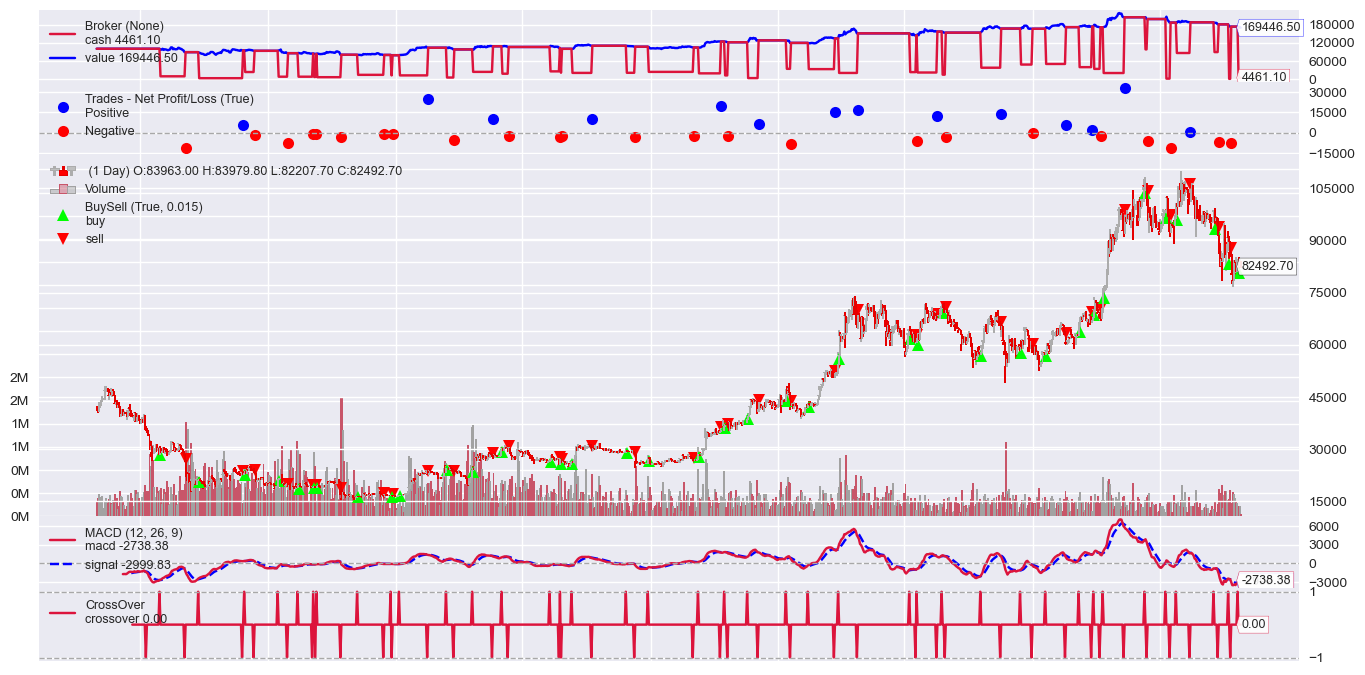

In [37]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt

class MACDStrategy(bt.Strategy):
    """
    简单的 MACD 策略:
    - 当 MACD 线上穿信号线 => 全仓买入
    - 当 MACD 线下穿信号线 => 卖出全部
    """
    params = (
        ('fastperiod', 12),      # MACD 快线 EMA 周期
        ('slowperiod', 26),      # MACD 慢线 EMA 周期
        ('signalperiod', 9),     # 信号线 EMA 周期
        ('printlog', True),      # 是否打印日志
    )
    
    def log(self, txt, dt=None):
        """日志记录函数"""
        if self.params.printlog:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')
    
    def __init__(self):
        self.order = None
        
        # 在 Backtrader 中，MACD 指标会有 macd, signal, hist 三条线
        self.macd_ind = bt.indicators.MACD(
            self.datas[0].close,
            period_me1=self.p.fastperiod,
            period_me2=self.p.slowperiod,
            period_signal=self.p.signalperiod
        )
        
        # 我们只需要判断 MACD 线 (macd) 与 信号线 (signal) 的交叉
        # >0 表示 macd 上穿 signal, <0 表示 macd 下穿 signal
        self.macd_crossover = bt.indicators.CrossOver(self.macd_ind.macd, self.macd_ind.signal)
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'买单执行, 价格: {order.executed.price:.2f}, 数量: {order.executed.size:.3f} BTC')
            else:
                self.log(f'卖单执行, 价格: {order.executed.price:.2f}, 数量: {order.executed.size:.3f} BTC')
        
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('订单取消/拒绝')
        
        self.order = None
    
    def next(self):
        # 如果有订单在执行，则不再继续下单
        if self.order:
            return
        
        # 若无持仓且 MACD 线上穿信号线 => 全仓买入
        if not self.position:
            if self.macd_crossover > 0:
                cash = self.broker.getcash()
                price = self.datas[0].close[0]
                # 计算可购买的 BTC 数量，确保是 0.001 BTC 的倍数
                size = int((cash // price) )  
                if size>0:  
                    self.log(f'买入信号 (MACD>Signal), 买入: {size:.3f} BTC, 当前价格: {price:.2f}')
                    self.order = self.buy(size=size)
        else:
            # 若已持仓且 MACD 线下穿信号线 => 卖出全部
            if self.macd_crossover < 0:
                self.log(f'卖出信号 (MACD<Signal), 卖出全部: {self.position.size:.3f} BTC')
                self.order = self.sell(size=self.position.size)
    
    def stop(self):
        """策略结束时输出最终资金"""
        self.log(f'策略结束，期末资金: {self.broker.getvalue():.2f}')


    cerebro = bt.Cerebro()
    cerebro.broker.setcash(100000.0)  # 初始资金

    # 加载比特币数据
    data_feed = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data_feed)

    # 添加 MACD 策略
    cerebro.addstrategy(MACDStrategy,
                        fastperiod=12,
                        slowperiod=26,
                        signalperiod=9,
                        printlog=True)

    print(f'初始资金: {cerebro.broker.getvalue():.2f}')
    cerebro.run()
    final_value = cerebro.broker.getvalue()
    print(f'回测结束，期末资金: {final_value:.2f}')

    # 绘制回测结果
    plt.figure(figsize=(12, 8))
    cerebro.plot(style='candlestick', iplot=False)
    plt.show()



初始资金: 100000.00
2022-03-21, 买入订单执行，价格: 41261.00
2025-03-18, 策略结束，期末资金: 182463.40
期末资金: 182463.40


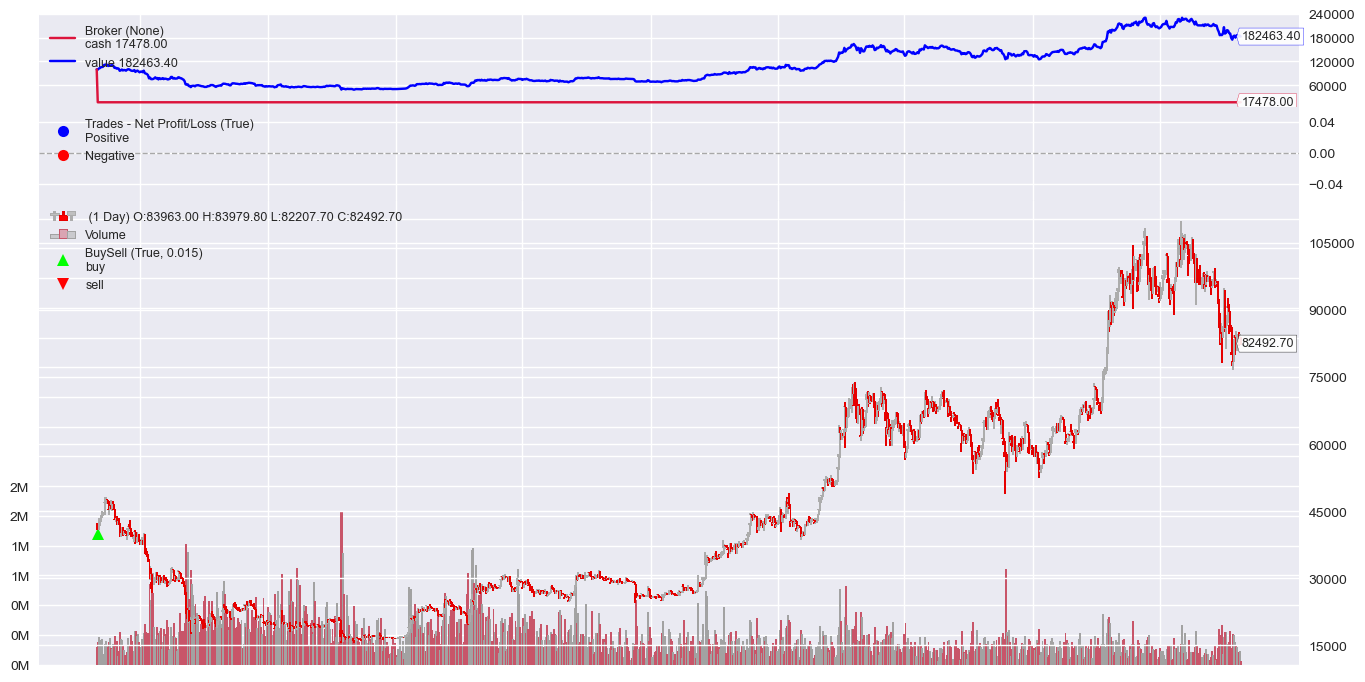

[[<Figure size 1400x700 with 4 Axes>]]

In [35]:
class BuyHoldStrategy(bt.Strategy):
    # 定义策略参数
    params = (
        ('printlog', True),  # 是否打印日志
    )
    
    def log(self, txt, dt=None):
        """日志记录函数"""
        if self.params.printlog:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')
    
    def __init__(self):
        # 用于跟踪订单状态
        self.order = None

    def next(self):
        # 如果没有持仓
        if not self.position:
            # 获取当前可用现金
            cash = self.broker.getcash()
            # 获取当前收盘价
            price = self.datas[0].close[0]
            # 计算可以买入的股票数量（向下取整）
            size = int(cash // price)
            
            # 如果计算出的数量大于0，则执行买入
            if size > 0:
                self.order = self.buy(size=size)
    
    def notify_order(self, order):
        """订单通知函数"""
        # 如果订单状态是提交或接受，直接返回
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        # 如果订单完成
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'买入订单执行，价格: {order.executed.price:.2f}')
            elif order.issell():
                self.log(f'卖出订单执行，价格: {order.executed.price:.2f}')
        
        # 如果订单被取消、保证金不足或拒绝
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('订单被取消/拒绝')
        
        # 重置订单引用
        self.order = None
    
    def stop(self):
        """策略结束时记录期末资金"""
        self.log(f'策略结束，期末资金: {self.broker.getvalue():.2f}')

# 创建回测引擎
cerebro = bt.Cerebro()
# 设置初始资金为10万
cerebro.broker.setcash(100000.0)

# 添加数据
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# 添加买入持有策略
cerebro.addstrategy(BuyHoldStrategy, printlog=True)

# 打印初始资金
print(f'初始资金: {cerebro.broker.getvalue():.2f}')
# 运行回测
results = cerebro.run()
# 获取最终资金
final_value = cerebro.broker.getvalue()
print(f'期末资金: {final_value:.2f}')

# 绘制回测结果
%matplotlib inline
cerebro.plot(style='candlestick', iplot=False)

策略性能比较

In [40]:
def run_strategy_and_get_metrics(strategy_class, data_feed, cash=100000.0, commission=0.0, **strategy_params):
    """
    运行策略并计算绩效指标
    参数:
        strategy_class: 策略类
        data_feed: 数据源
        cash: 初始资金
        commission: 交易手续费
        strategy_params: 策略参数
    """
    # 创建回测引擎
    cerebro = bt.Cerebro()
    # 设置初始资金
    cerebro.broker.setcash(cash)
    # 设置交易手续费
    cerebro.broker.setcommission(commission=commission)
    # 添加数据源
    cerebro.adddata(data_feed)
    # 添加策略
    cerebro.addstrategy(strategy_class, **strategy_params)
    
    # 添加分析器
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')  # 夏普比率分析器
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')  # 最大回撤分析器
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns', tann=252)  # 年化收益率分析器
    
    # 运行回测
    results = cerebro.run()
    strat = results[0]
    
    # 获取各项指标
    sharpe = strat.analyzers.sharpe.get_analysis().get('sharperatio', None)  # 夏普比率
    drawdown = strat.analyzers.drawdown.get_analysis().get('max', {}).get('drawdown', None)  # 最大回撤
    annual_return = strat.analyzers.returns.get_analysis().get('rnorm100', None)  # 年化收益率
    
    # 整理指标
    metrics = {
        'Sharpe Ratio': sharpe,
        'Max Drawdown (%)': drawdown,
        'Annual Return (%)': annual_return
    }
    return metrics

# 定义要比较的策略及其参数
strategy_configs = [
    ('MA Cross', MovingAverageCrossStrategy, dict(fast_period=20, slow_period=50)),  # 均线交叉策略
    ('RSI', RSIStrategy, dict(rsi_period=14, rsi_low=30, rsi_high=70)),  # RSI策略
    ('Bollinger Bands', BollingerBandsStrategy, dict(period=20, devfactor=2.0)),  # 布林带策略
    ('MACD', MACDStrategy, dict(fastperiod=12, slowperiod=26, signalperiod=9)),  # MACD策略
]

# 存储各策略的绩效指标
results_dict = {}

# 遍历所有策略并计算绩效
for name, strat_class, params in strategy_configs:
    metrics = run_strategy_and_get_metrics(strat_class, data_feed, cash=100000.0, commission=0.0, **params)
    results_dict[name] = metrics

# 将结果转换为DataFrame并排序
performance_df = pd.DataFrame.from_dict(results_dict, orient='index')
performance_df = performance_df.sort_values('Annual Return (%)', ascending=False)

# 打印策略绩效对比结果
print("策略绩效对比：")
print(performance_df)

2022-07-28, 买入信号 (fast_ma>slow_ma), 买入: 4.195 BTC, 花费: 99992.86 元
2022-07-29, 买单执行, 价格: 23836.20, 数量: 4.195 BTC
2022-08-29, 卖出信号 (fast_ma<slow_ma), 卖出全部: 4.195 BTC
2022-08-30, 卖单执行, 价格: 20275.50, 数量: -4.195 BTC
2022-10-31, 买入信号 (fast_ma>slow_ma), 买入: 4.153 BTC, 花费: 85061.75 元
2022-11-01, 买单执行, 价格: 20482.10, 数量: 4.153 BTC
2022-11-14, 卖出信号 (fast_ma<slow_ma), 卖出全部: 4.153 BTC
2022-11-15, 卖单执行, 价格: 16605.30, 数量: -4.153 BTC
2022-12-25, 买入信号 (fast_ma>slow_ma), 买入: 4.098 BTC, 花费: 68946.39 元
2022-12-26, 买单执行, 价格: 16824.50, 数量: 4.098 BTC
2023-01-03, 卖出信号 (fast_ma<slow_ma), 卖出全部: 4.098 BTC
2023-01-04, 卖单执行, 价格: 16667.30, 数量: -4.098 BTC
2023-01-12, 买入信号 (fast_ma>slow_ma), 买入: 3.626 BTC, 花费: 68306.59 元
2023-01-13, 买单执行, 价格: 18838.10, 数量: 3.626 BTC
2023-03-10, 卖出信号 (fast_ma<slow_ma), 卖出全部: 3.626 BTC
2023-03-11, 卖单执行, 价格: 20140.30, 数量: -3.626 BTC
2023-03-19, 买入信号 (fast_ma>slow_ma), 买入: 2.612 BTC, 花费: 73020.29 元
2023-03-20, 买单执行, 价格: 27955.80, 数量: 2.612 BTC
2023-05-08, 卖出信号 (fast_ma<slow_ma), 卖出全部: 2.

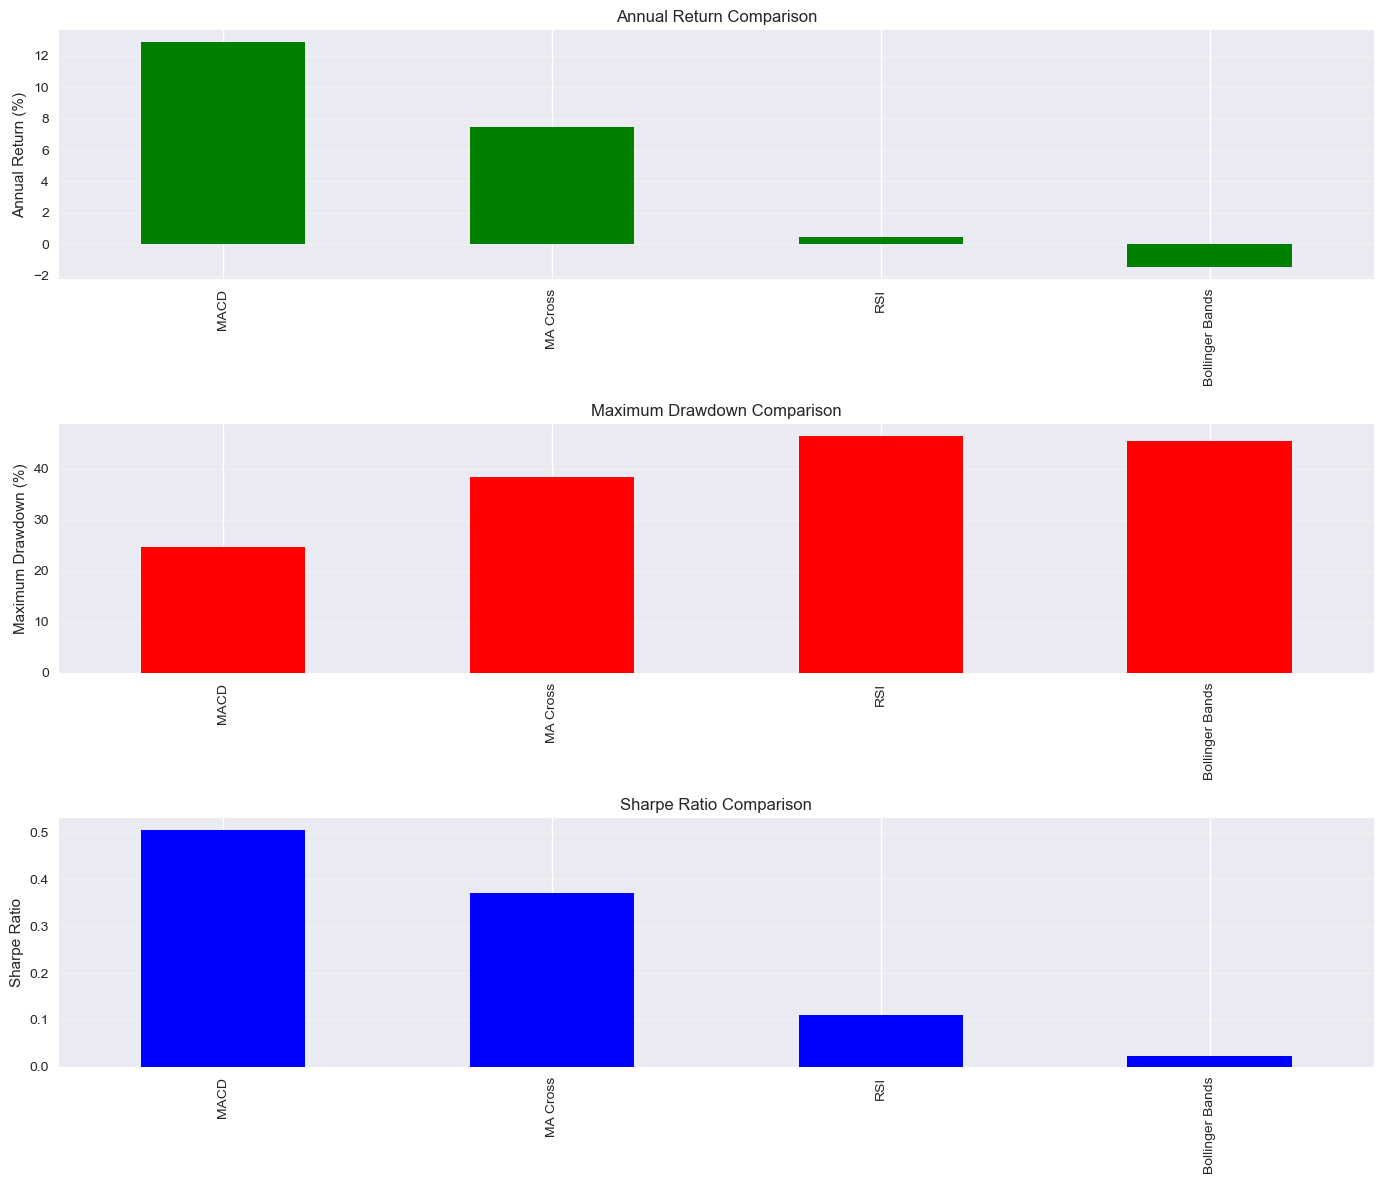

In [42]:
# ---------------------------
# Strategy Performance Visualization
# ---------------------------
%matplotlib inline

# Create figure with size 14x12
plt.figure(figsize=(14, 12))

# Plot Annual Return Comparison
plt.subplot(3, 1, 1)
performance_df['Annual Return (%)'].plot(kind='bar', color='green')
plt.title('Annual Return Comparison')
plt.ylabel('Annual Return (%)')
plt.grid(axis='y', alpha=0.3)

# Plot Maximum Drawdown Comparison
plt.subplot(3, 1, 2)
performance_df['Max Drawdown (%)'].plot(kind='bar', color='red')
plt.title('Maximum Drawdown Comparison')
plt.ylabel('Maximum Drawdown (%)')
plt.grid(axis='y', alpha=0.3)

# Plot Sharpe Ratio Comparison
plt.subplot(3, 1, 3)
performance_df['Sharpe Ratio'].plot(kind='bar', color='blue')
plt.title('Sharpe Ratio Comparison')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y', alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()